# Sparse Matrices in SciPy

The main module that we work with in this chapter is the sparse module in SciPy
library. We assume that this module is included under the name `sp`, and in addition we
need to explicitly import its submodule `linalg`, to make this module accessible through
`sp.linalg`

In [1]:
import scipy.sparse as sp
import scipy.sparse.linalg

We also need the NumPy library, which we, as usual, import under the name `np`, and
the Matplotlib library for plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt

And in the last part of this chapter, we use the networkx module, which we import
under the name `nx`:

In [3]:
import networkx as nx

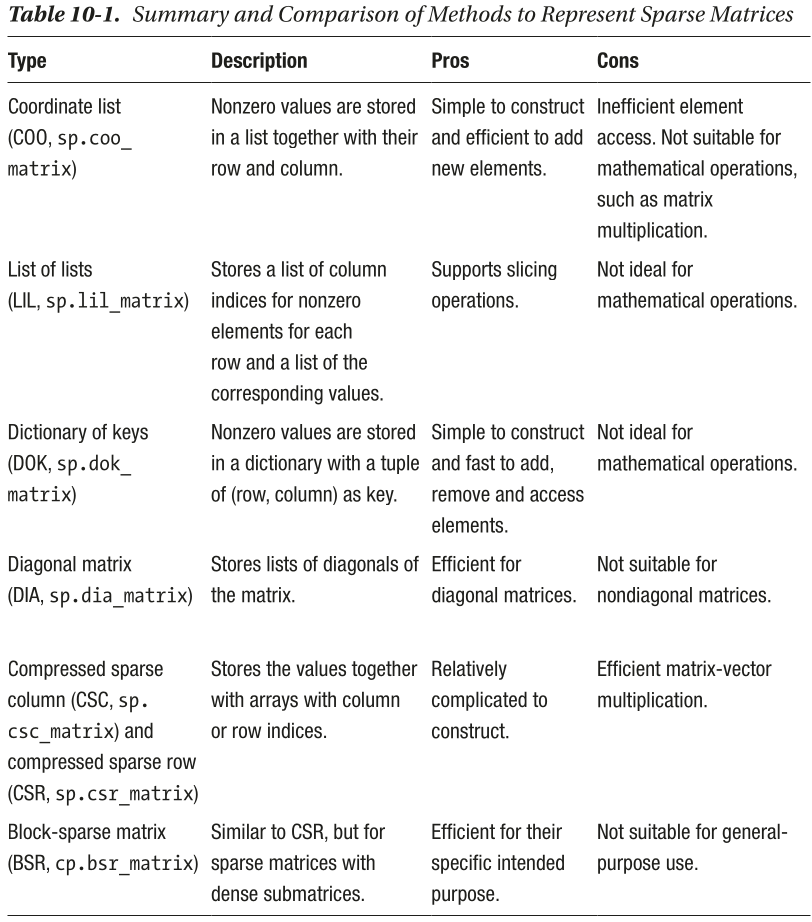

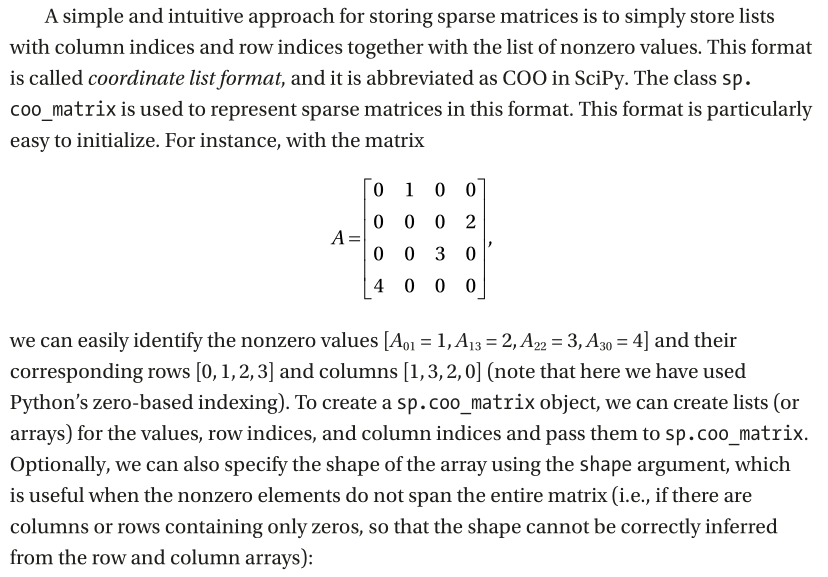

In [4]:
values = [1, 2, 3, 4]
rows = [0, 1, 2, 3]
cols = [1, 3, 2, 0]

A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])
A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

The result is a data structure that represents the sparse matrix. All sparse matrix
representations in SciPy’s sparse module share several common attributes, many of
which are derived from NumPy’s ndarray object. Examples of such attributes are `size`,
`shape`, `dtype`, and `ndim`, and common to all sparse matrix representations are the `nnz`
(number of nonzero elements) and `data` (the nonzero values) attributes

In [7]:
A.shape, A.size, A.dtype, A.ndim

((4, 4), 4, dtype('int64'), 2)

In [10]:
# Number of not zero valuee and data
A.nnz, A.data

(4, array([1, 2, 3, 4]))

In addition to the shared attributes, each type of sparse matrix representation also
has attributes that are specific to its way of storing the positions for each nonzero value.
For the case of `sp.coo_matrix` objects, there are `row` and `col`A.row attributes for accessing the
underlying row and column arrays

In [11]:
A.row

array([0, 1, 2, 3], dtype=int32)

In [12]:
A.col

array([1, 3, 2, 0], dtype=int32)

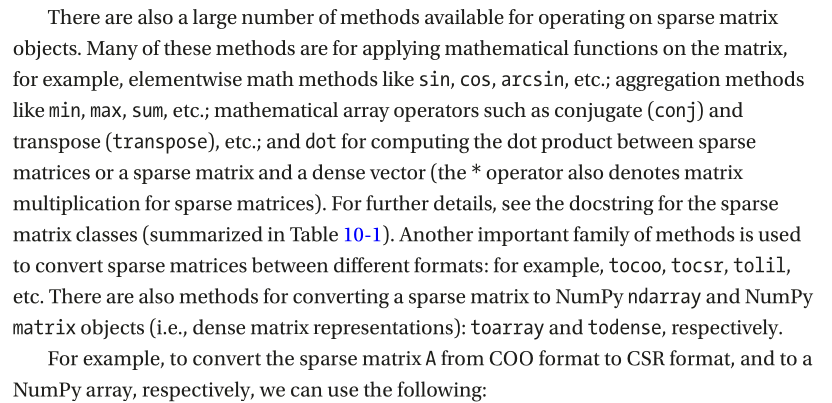

In [13]:
A.tocsr()

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [6]:
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

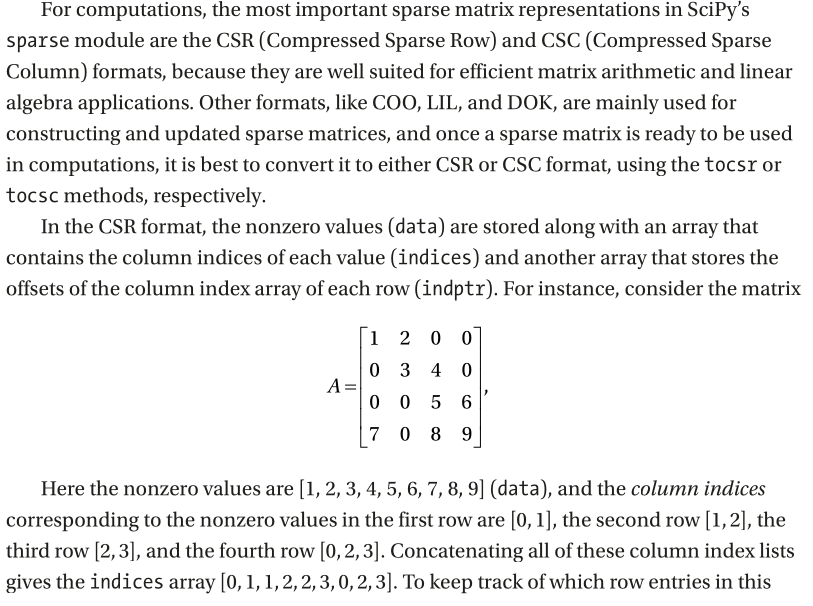

In [15]:
A = np.array([[1, 2, 0, 0], [0, 3, 4, 0], [0, 0, 5, 6], [7, 0, 8, 9]])
A

array([[1, 2, 0, 0],
       [0, 3, 4, 0],
       [0, 0, 5, 6],
       [7, 0, 8, 9]])

In [16]:
A = sp.csr_matrix(A)
A.data

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
A.indices

array([0, 1, 1, 2, 2, 3, 0, 2, 3], dtype=int32)

In [18]:
A.indptr

array([0, 2, 4, 6, 9], dtype=int32)

In [19]:
i = 2
A.indptr[i], A.indptr[i+1]-1

(4, 5)

In [20]:
A.indices[A.indptr[i]:A.indptr[i+1]]

array([2, 3], dtype=int32)

In [21]:
A.data[A.indptr[i]:A.indptr[i+1]]

array([5, 6])

In [22]:
A[2, 2], A[2,3]

(5, 6)

While the CSR storage method is not as intuitive as COO, LIL, or DOK, it turns out
that it is well suited for use in the implementation of matrix arithmetic and for linear
algebra operations. Together with the CSC format, it is therefore the main format for use
in sparse matrix computations. The CSC format is essentially identical to CSR, except
that instead of column indices and row pointers, row indices and column pointers are
used (i.e., the role of columns and rows is reversed).